# Задача №5

> Файл «Данные к задаче 5.tsv» содержит сведения о студентах, обучавшихся на втором курсе
Программной Инженерии в 2015-2016 учебном году:

> x — итоговая оценка за курс «Теория вероятностей и математическая статистика»;

> d — пол студента (0 — юноша, 1 — девушка);

> y — оценка за контрольную работу по нашему курсу


In [9]:
import pandas as pd

data = pd.read_csv("Данные к задаче 5.tsv", sep='\t', header=0)
data = data.rename(columns=lambda x: x.strip())
data = data[['x4','d4','y4']]

Нам предлогаются две модели:

«Длинная» регрессия: $y_i = β_1 + β_2 x_i + β_3 d_i + ϵ_i$

«Короткая» регрессия: $y_i = γ_1 + γ_2 x_i + ν_i$

Они отличаются только тем что «короткая» не учитывает пол.

# 1. Оцените длинную и короткую регрессии по наблюдениям 1-50 вашего варианта. Выпишите оценённые уравнения, дайте интерпретацию полученным коэффициентам.

Регрессионные уравнения можно записать в матричной форме: $Y = βX + ϵ$

Тут $β$ это вектор коэффициентов: $β = \begin{pmatrix}β_1 \\ β_2 \\ β_3\end{pmatrix}$ в «длинной» модели и $β = \begin{pmatrix}γ_1 \\ γ_2\end{pmatrix}$ в «короткой».

$Y = \begin{pmatrix}y_1 \\ \vdots \\ y_i\end{pmatrix}$ это вектор наблюдений, а $X = \begin{pmatrix}1 & x_1 & d_1 \\ \vdots&\vdots&\vdots \\ 1 & x_i & d_i\end{pmatrix}$ или $X = \begin{pmatrix}1 & x_1 \\ \vdots&\vdots \\ 1 & x_i\end{pmatrix}$ это матрицы исходных данных.

В оценочной форме эти уравнения будут $\hat{Y} = \hat{β}X$ уже без случайной ошибки $ϵ$, а 
$\hat{Y} = \begin{pmatrix}\hat{y}_1 \\ \vdots \\ \hat{y}_i\end{pmatrix}$ будет вектором предсказаний.

Чтобы найти $\hat{β}$ методом наименьших квадратов нужно минимизировать сумму $\displaystyle\sum_k \left(\hat{y}_k - y_k\right)^2$, тоесть длинну$^2$ вектора $\hat{Y} - Y$.

Если решить уравнения нормалей в матричной форме, получится общая формула $\hat{β} = \left(X^TX\right)^{-1}X^TY$

In [77]:
from IPython.display import display, Latex
import numpy as np

def nparr(colname):
    return np.array(list(data[colname]), dtype=np.float64)

Y = np.matrix(nparr('y4')[:50]).T
X1 = np.stack([np.array([1]*50), nparr('x4')[:50], nparr('d4')[:50]], axis=1)
X1 = np.matrix(X1)
X2 = X1[:,:2]
beta1 = (X1.T*X1)**-1 * X1.T * Y
beta2 = (X2.T*X2)**-1 * X2.T * Y

display(Latex(f"$y_i = {beta1[0,0]:.2f} + {beta1[1,0]:.2f} x_i {beta1[2,0]:.2f} d_i + ϵ_i$"))
display(Latex(f"$y_i = {beta2[0,0]:.2f} + {beta2[1,0]:.2f} x_i + ν_i$"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

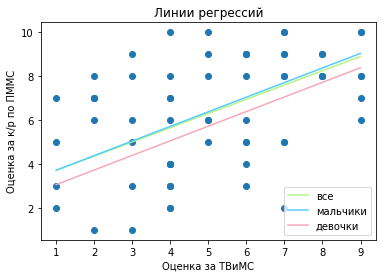

In [97]:
import matplotlib.pyplot as plt

x = nparr('x4')
l = np.array([max(x),min(x)])
plt.scatter(x, nparr('y4'))
plt.plot(l, beta2[0,0] + l*beta2[1,0], c='#B8F483', label='все')
plt.plot(l, beta1[0,0] + l*beta1[1,0], c='#55CDFC', label='мальчики')
plt.plot(l, beta1[0,0] + l*beta1[1,0] + beta1[2,0], c='#F7A8B8', label='девочки')

plt.title('Линии регрессий')
plt.xlabel('Оценка за ТВиМС')
plt.ylabel('Оценка за к/р по ПММС')
plt.legend(loc='lower right')
plt.show()

# 2. Рассчитайте значения $R^2$ для обеих моделей.

$$ R^2 = 1 - \frac{\mathrm{RSS}}{\mathrm{TSS}} $$
$$ \mathrm{RSS} = \sum_k \left(\hat{y}_k - y_k\right)^2 $$
$$ \mathrm{TSS} = \sum_k \left(y_k - \bar{Y}\right)^2 $$

In [110]:
def R2(data):
    data = np.array(data)
    y = np.array(Y)
    Ybar = sum(y)/len(y)
    return (1 - sum((data - y)**2)/sum((y - Ybar)**2))[0]

r1 = R2(X1 * beta1)
r2 = R2(X2 * beta2) 
display(Latex(r"$R^2 \text{ для «длинной» регрессии} = %.5f$" % r1))
display(Latex(r"$R^2 \text{ для «короткой» регрессии} = %.5f$" % r2))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# 3. По каждой модели рассчитайте прогноз оценки за контрольную работу для наблюдений 51–65 вашего варианта и среднюю абсолютную ошибку прогноза

$$\text{MAE} = \frac{1}{15}\sum_{i=51}^{65} \left|y_i - \hat{y}_i\right|$$

In [117]:
Y_2 = np.matrix(nparr('y4')[50:]).T
X1_2 = np.stack([np.array([1]*15), nparr('x4')[50:], nparr('d4')[50:]], axis=1)
X1_2 = np.matrix(X1_2)
X2_2 = X1_2[:,:2]

mae1 = abs(X1_2 * beta1 - Y_2).mean()
mae2 = abs(X2_2 * beta2 - Y_2).mean()
display(Latex(r"$\text{MAE для «длинной» регрессии} = %.5f$" % mae1))
display(Latex(r"$\text{MAE для «короткой» регрессии} = %.5f$" % mae2))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

# 4. Выберите модель с меньшей ошибкой и с её помощью спрогнозируйте собственную оценку за контрольную работу по курсу «Прикладные методы математической статистики»

In [118]:
beta2[0,0] + 7 * beta2[1,0]

7.597943358057993